In [1]:
import sympy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Determination of the momentum probability distribution/density for gamma_+ = gamma_- -> infinity

def P_momentum(n, l):
    if ((-1)**int(n) == (-1)**int(l) and abs(int(n))!=abs(int(l))):
        return 0
    elif (abs(int(n))==abs(int(l))):
        return 1/4
    elif ((-1)**int(n) == -(-1)**int(l)):
        return ((2*l)/(np.pi*(n**2-l**2)))**2

def P_momentumArray(n, l):
    P_return = []
    for element in n:
        P_return.append(P_momentum(element, l))
    return P_return

def P_momentumContinuousGammaInf(k, l, L):
    if (-1)**int(l)==1:
        return L/np.pi*np.power(np.sin(l*np.pi/2 + k*L/2)/(l*np.pi + k*L) - np.sin(l*np.pi/2 - k*L/2)/(l*np.pi - k*L), 2)
    elif (-1)**int(l)==-1:
        return L/np.pi*np.power(np.sin(l*np.pi/2 + k*L/2)/(l*np.pi + k*L) + np.sin(l*np.pi/2 - k*L/2)/(l*np.pi - k*L), 2)

In [3]:
# Correnspondance between gamma and k resp. kappa for gamma_+ = gamma_ =: gamma

from scipy.optimize import fsolve

posRelEven = lambda g, k: g-np.arctan(k*np.tan(k/2))
posRelOdd = lambda g, k: g+np.arctan(k/(np.tan(k/2)))

negRelEven = lambda g, k: g+np.arctan(k*np.tanh(k/2))
negRelOdd = lambda g, k: g+np.arctan(k/np.tanh(k/2))

def gamma_to_k(gamma, l):
    gammaPrime = np.arctan(gamma)
    length = np.size(gamma)

    if l > 2:
        if l%2 == 0:
            rel = posRelOdd
            #print("Odd Case")
        else:
            rel = posRelEven
            #print("Even Case")

        kGuess = np.full(length, l-1)*np.pi
        kSolve = fsolve(lambda k: rel(gammaPrime, k), kGuess)
        return kSolve

    if l == 1:
        gammaGreaterZero = gammaPrime[gammaPrime >= 0]
        gammaSmallerZero = gammaPrime[gammaPrime < 0]

        lGreater = np.size(gammaGreaterZero)

        kGuessPosLowestEven = np.linspace(0.5, 1, lGreater)*np.pi
        KGuessNegLowestEven = -np.tan(gammaSmallerZero)

        kSolvePosLowestEven = np.array([])
        kSolveNegLowestEven = np.array([])

        if np.size(gammaGreaterZero) > 0:
            kSolvePosLowestEven = fsolve(lambda k: posRelEven(gammaGreaterZero, k), kGuessPosLowestEven)
        if np.size(gammaSmallerZero) > 0:
            kSolveNegLowestEven = fsolve(lambda k: negRelEven(gammaSmallerZero, k), KGuessNegLowestEven)
            
        return np.concatenate((kSolveNegLowestEven*1j, kSolvePosLowestEven))
        #return {"k" : kSolvePosLowestEven, "kappa" : kSolveNegLowestEven}

    if l == 2:
        gammaGreaterMinusLHlaf = gammaPrime[gammaPrime >= np.arctan(-2)]
        gammaSmallerMinusLHlaf = gammaPrime[gammaPrime < np.arctan(-2)]

        lGreater = np.size(gammaGreaterMinusLHlaf)

        kGuessPosLowestOdd = np.full(lGreater, 1)*np.pi
        kGuessNegLowestOdd = -np.tan(gammaSmallerMinusLHlaf)

        kSolvePosLowestOdd = np.array([])
        kSolveNegLowestOdd = np.array([])

        if np.size(gammaGreaterMinusLHlaf) > 0:
            kSolvePosLowestOdd = fsolve(lambda k: posRelOdd(gammaGreaterMinusLHlaf, k), kGuessPosLowestOdd)
        if np.size(gammaSmallerMinusLHlaf) > 0:
            kSolveNegLowestOdd = fsolve(lambda k: negRelOdd(gammaSmallerMinusLHlaf, k), kGuessNegLowestOdd)

        return np.concatenate((kSolveNegLowestOdd*1j, kSolvePosLowestOdd))


In [4]:
# Determination of the momentum probability distribution/density for gamma_+ = gamma_- =: gamma

def P_momentumCountiuous_kl(k, kl, l, L):
    if l%2 == 0:
        return (L/np.pi)/(1-np.sin(kl)/kl)*np.power(np.sin(kl/2+k/2)/(kl+k)-np.sin(kl/2-k/2)/(kl-k),2)
    else:
        return (L/np.pi)/(1+np.sin(kl)/kl)*np.power(np.sin(kl/2+k/2)/(kl+k)+np.sin(kl/2-k/2)/(kl-k),2)

def P_momentumCountiuous_kappal(k, kappal, l, L):
    if l%2 == 0:
        return (l/np.pi)*4/(-1+np.sinh(kappal)/kappal)*np.power((k*np.cos(k/2)*np.sinh(kappal/2)-kappal*np.sin(k/2)*np.cosh(kappal/2))/(kappal**2 + np.power(k,2)) ,2)
    else:
        return (l/np.pi)*4/(1+np.sinh(kappal)/kappal)*np.power((k*np.sin(k/2)*np.cosh(kappal/2)-kappal*np.cos(k/2)*np.sinh(kappal/2))/(kappal**2 + np.power(k,2)) ,2)


In [5]:
def P_momentumContinuous(k, gamma, l, L):

    Kl = gamma_to_k(gamma, l)/np.pi
    kappal = np.imag(Kl[np.real(Kl)==0])
    kl = np.real(Kl[np.imag(Kl)==0])

    distr = []
    for i in kappal:
        distr.append(P_momentumCountiuous_kappal(k*L, i*L, l, L))
    for i in kl:
        distr.append(P_momentumCountiuous_kl(k*L, i*L, l, L))

    return np.array(distr)

def getP_momentumDiscrete(kn, gamma, l, L):
    return P_momentumContinuous(kn, gamma, l, L)*np.pi/L


(-4.0, 16.0)

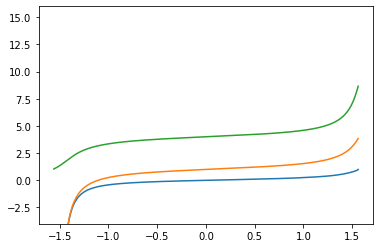

In [6]:
# Testing gamma_to_k function

gamma = np.tan(np.linspace(-np.pi/2+10**(-2), np.pi/2-10**(-2), 300))
plt.plot(np.arctan(gamma), np.real(np.power(gamma_to_k(gamma, 1),2))/np.pi**2)
plt.plot(np.arctan(gamma), np.real(np.power(gamma_to_k(gamma, 2),2))/np.pi**2)
plt.plot(np.arctan(gamma), np.real(np.power(gamma_to_k(gamma, 3),2))/np.pi**2)
plt.ylim(-4, 16)


<BarContainer object of 31 artists>

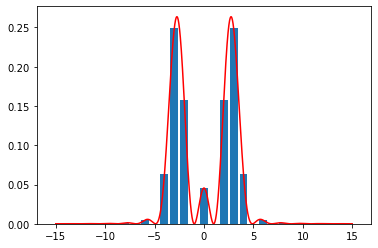

In [7]:
# Testing momentum distribution (general case with gamma_+ = gamma_- =: gammma)

L = np.pi
gamma = 100
l = 3

bound = 15
cStep = 0.01
dStep = 1

k = np.arange(-bound, bound+cStep, cStep)*np.pi/L
kn = np.arange(-bound, bound+dStep, dStep)*np.pi/L

distr = P_momentumContinuous(k, gamma, l, L)
plt.plot(k, distr[0], c="r")

distrDisc = getP_momentumDiscrete(kn, gamma, l, L)
plt.bar(kn, distrDisc[0])

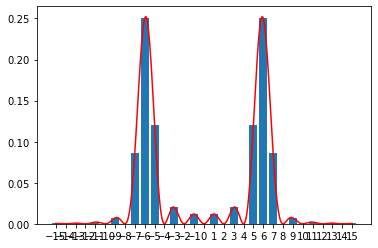

In [8]:
# Testing momentum distribution (specific case with gamma_+ = gamma_- -> infinity)

fig = plt.figure()

bound = 15
step = 1
step2 = 0.01
x = np.arange(-bound, bound+step, step)
x2 = np.arange(-bound, bound+step2, step2)

plt.xticks(x)

l = 6

momentumDistr = P_momentumArray(x, l)
plt.bar(x, momentumDistr)
plt.plot(x2, P_momentumContinuousGammaInf(x2, l, np.pi), c="r")

In [9]:
# Some insignificant limes

j = np.arange(-10000, 10000, 1)
l=100
np.sum(((-1)**l/(2*j+2*l+1)-1/(2*j+1))**2)/(np.pi)**2

0.49999999983110094

In [10]:
# Some symbolic computations for comfirming handmade results

gammaP, gammaM = sp.symbols("\gamma_{+}, \gamma{-}", real=True)
lambdaP, lambdaM, lambdaPM = sp.symbols("\lambda_{+}, \lambda_{-}, \lambda", imaginary=True)
sigma = (1-lambdaPM)/(1+lambdaPM)
L = sp.symbols("L", real=True, positive=True)
n = sp.symbols("n", integer=True)
l = sp.symbols("l", integer=True, positive=True)

In [11]:
k, kl = sp.symbols("k, k_l", real=True, positive=True)
x = sp.symbols("x", real=True)

sp.simplify(sp.integrate(sp.sinh(kl*x)*sp.exp(-sp.I*k*x), (x, -L/2, L/2)))

(I*k*sinh(L*k_l/2) + k_l*cosh(L*k_l/2) + (I*k*sinh(L*k_l/2) - k_l*cosh(L*k_l/2))*exp(I*L*k))*exp(-I*L*k/2)/(k**2 + k_l**2)

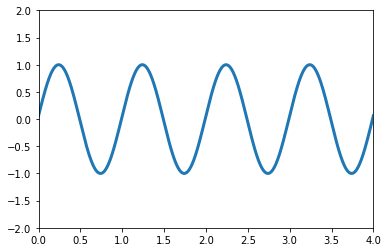

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams['animation.ffmpeg_path'] = r'C:\ProgramData\Anaconda3\Library\bin\ffmpeg.exe'


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)



def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

anim.save("test2.gif")